# Data loading and processing

- Preparing the data is an important part in solving any machine learning problem
- PyTorch provides many tools to make data loading and processing easy
    - the code is more readable
    - memory efficiency
    - transform the data
    - iterate on the data

## Dataset

- torch.utils.data.Dataset is an abstract class representing a dataset. 
- custom dataset should **inherit Dataset** and **override** the following methods:
    - ```__len__``` so that ```len(dataset)``` returns the size of the dataset.
    - ```__getitem__``` to support the indexing such that ```dataset[i]``` can be used to get i th sample

**Memory efficiency** :  ```__getitem__``` should read an load data as required to avoid to store in the memory all the data.

``` python
from torch.utils.data import Dataset

class MyDataSet(Dataset):
    def __init__(self):
        super().__init__()
        
    def __len__(self):
        return 0
    
    def __getitem__(self, idx):
        return None
```

In [283]:
import os
import numpy as np
from torchvision.datasets.folder import ImageFolder, default_loader
from torchvision.datasets.utils import download_url, check_integrity

class EdibleWildPlantsDataset(ImageFolder):
    """
    The 'Edible Wild Plants' dataset from kaggle.

    https://www.kaggle.com/gverzea/edible-wild-plants

    Args:
        root: the location where to store the dataset
        suffix: path to the train/valid/sample dataset. See folder structure.
        transform (callable, optional): A function/transform that takes in
            an PIL image and returns a transformed version.
            E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that
            takes in the target and transforms it.
        loader: A function to load an image given its path.
        download: if ``True``, download the data.


    The folder structure of the dataset is as follows::

...

    """
    url = "https://www.kaggle.com/gverzea/edible-wild-plants/downloads/edible-wild-plants.zip/5"
    filename = "edible-wild-plants.zip"
    checksum = "22934d7bb30c6e1ebbb805fd186afd6f"

    def __init__(self,
                 root: str,
                 suffix: str,
                 transform=None,
                 target_transform=None,
                 loader=default_loader,
                 download=False):
        self.root = os.path.expanduser(root)

        if download:
            self._download()
            self._extract()

        if not self._check_integrity():
            raise RuntimeError("Dataset not found or corrupted. "
                               "You can use download=True to download it")

        path = os.path.join(self.root, suffix)
        print(f"Loading data from {path}.")
        assert os.path.isdir(path), f"'{suffix}' is not valid."

        super().__init__(path, transform, target_transform, loader)
    
    #def __getitem__(self, idx):
        #item = super().__getitem__(idx)
        #return (item[0], np.ndarray(item[1]))

    def _download(self):
        if self._check_integrity():
            print("Dataset already downloaded and verified.")
            return

        root = self.root
        print("Downloading dataset... (this might take a while)")
        download_url(self.url, root, self.filename, self.checksum)

    def _extract(self):
        import zipfile
        path_to_zip = os.path.join(self.root, self.filename)
        with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
            zip_ref.extractall(self.root)
        with zipfile.ZipFile(os.path.join(self.root, 'datasets.zip'), 'r') as zip_ref:
            zip_ref.extractall(self.root)

    def _check_integrity(self):
        
        path_to_zip = os.path.join(self.root, self.filename)
        print (path_to_zip)
        return check_integrity(path_to_zip, self.checksum)

In [284]:
train_dataset = EdibleWildPlantsDataset('../data', 'dataset', download=True)

../data/edible-wild-plants.zip
Dataset already downloaded and verified.
../data/edible-wild-plants.zip
Loading data from ../data/dataset.


In [282]:
len(train_dataset)

6558

In [260]:
# the __getitem__ method
train_dataset[0]

(<PIL.Image.Image image mode=RGB size=300x225 at 0x7F93E03D21D0>, 0)

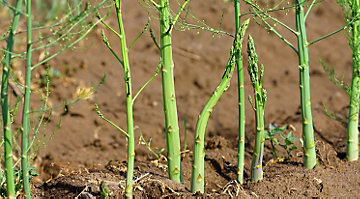

In [261]:
train_dataset[80][0]

In [262]:
train_dataset.classes

['Alfalfa',
 'Asparagus',
 'Blue Vervain',
 'Broadleaf Plantain',
 'Bull Thistle',
 'Cattail',
 'Chickweed',
 'Chicory',
 'Cleavers',
 'Coltsfoot',
 'Common Sow Thistle',
 'Common Yarrow',
 'Coneflower',
 'Creeping Charlie',
 'Crimson Clover',
 'Curly Dock',
 'Daisy Fleabane',
 'Dandellion',
 'Downy Yellow Violet',
 'Elderberry',
 'Evening Primrose',
 'Fern Leaf Yarrow',
 'Field Pennycress',
 'Fireweed',
 'Forget Me Not',
 'Garlic Mustard',
 'Harebell',
 'Henbit',
 'Herb Robert',
 'Japanese Knotweed',
 'Joe Pye Weed',
 'Knapweed',
 'Kudzu',
 'Lambs Quarters',
 'Mallow',
 'Mayapple',
 'Meadowsweet',
 'Milk Thistle',
 'Mullein',
 'New England Aster',
 'Partridgeberry',
 'Peppergrass',
 'Pickerelweed',
 'Pineapple Weed',
 'Prickly Pear Cactus',
 'Purple Deadnettle',
 'Queen Annes Lace',
 'Red Clover',
 'Sheep Sorrel',
 'Shepherds Purse',
 'Spring Beauty',
 'Sunflower',
 'Supplejack Vine',
 'Tea Plant',
 'Teasel',
 'Toothwort',
 'Vervain Mallow',
 'Wild Bee Balm',
 'Wild Black Cherry',
 'W

In [263]:
train_dataset.class_to_idx

{'Alfalfa': 0,
 'Asparagus': 1,
 'Blue Vervain': 2,
 'Broadleaf Plantain': 3,
 'Bull Thistle': 4,
 'Cattail': 5,
 'Chickweed': 6,
 'Chicory': 7,
 'Cleavers': 8,
 'Coltsfoot': 9,
 'Common Sow Thistle': 10,
 'Common Yarrow': 11,
 'Coneflower': 12,
 'Creeping Charlie': 13,
 'Crimson Clover': 14,
 'Curly Dock': 15,
 'Daisy Fleabane': 16,
 'Dandellion': 17,
 'Downy Yellow Violet': 18,
 'Elderberry': 19,
 'Evening Primrose': 20,
 'Fern Leaf Yarrow': 21,
 'Field Pennycress': 22,
 'Fireweed': 23,
 'Forget Me Not': 24,
 'Garlic Mustard': 25,
 'Harebell': 26,
 'Henbit': 27,
 'Herb Robert': 28,
 'Japanese Knotweed': 29,
 'Joe Pye Weed': 30,
 'Knapweed': 31,
 'Kudzu': 32,
 'Lambs Quarters': 33,
 'Mallow': 34,
 'Mayapple': 35,
 'Meadowsweet': 36,
 'Milk Thistle': 37,
 'Mullein': 38,
 'New England Aster': 39,
 'Partridgeberry': 40,
 'Peppergrass': 41,
 'Pickerelweed': 42,
 'Pineapple Weed': 43,
 'Prickly Pear Cactus': 44,
 'Purple Deadnettle': 45,
 'Queen Annes Lace': 46,
 'Red Clover': 47,
 'Sheep 

In [264]:
train_dataset.imgs

[('../data/dataset/Alfalfa/Alfalfa.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa10.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa11.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa12.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa13.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa14.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa15.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa16.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa17.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa18.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa19.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa2.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa20.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa21.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa22.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa23.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa24.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa25.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa26.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa27.jpg', 0),
 ('../data/dataset/Alfalfa/Alfalfa28.jpg', 0),
 ('../data/datas

## Transforms the dataset

Common image transformation that can be composed/chained.
- Reshape
- RandomCrop: data augmentation
- ToTensor: to convert the numpy images to torch images
- Normalize

https://pytorch.org/docs/stable/torchvision/transforms.htm

In [265]:
from torchvision import transforms

transform = transforms.Compose([
        transforms.Resize(size=256),
        #transforms.CenterCrop(size=256),
        transforms.RandomCrop(size=256),
        transforms.ToTensor(),
        #transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])

In [266]:
train_dataset = EdibleWildPlantsDataset('../data','dataset',transform=transform)

../data/edible-wild-plants.zip
Loading data from ../data/dataset.


In [267]:
train_dataset[0][1]

0

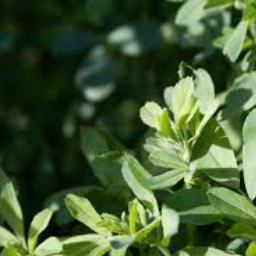

In [268]:
transforms.ToPILImage(mode='RGB')(train_dataset[10][0])

## Iterating through the dataset

### Until now
- An image is read from the file on the fly
- Transforms are applied on the read image
- Since one of the transforms is random, data is augmentated on sampling

- provides iterators over the dataset.

### Iterating with a for loop

In [278]:
train_dataset = EdibleWildPlantsDataset('../data',
                                   'dataset', 
                                   transform=transforms.Compose([
                                               transforms.Resize(256),
                                               transforms.RandomCrop(256),
                                               transforms.ToTensor()
                                           ]),
                                   #target_transform=transforms.ToTensor()
                                  )

for i in range(10):
    print(i, train_dataset[i][0].size(), train_dataset[i][1])

../data/edible-wild-plants.zip


RuntimeError: Dataset not found or corrupted. You can use download=True to download it

### Iterating with torch.utils.data.DataLoader

- Batching the data
- Shuffling the data
- Load the data in parallel using multiprocessing workers

In [270]:
from torch.utils.data import DataLoader
#DataLoader?

In [271]:
dataloader = DataLoader(train_dataset, batch_size=4,
                        shuffle=True, num_workers=4)

In [272]:
train_iter = iter(train_dataset)
X, y = next(train_iter)

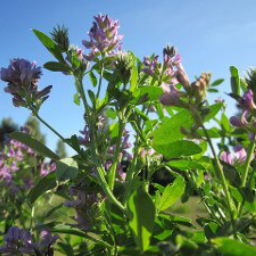

In [273]:
transforms.ToPILImage(mode='RGB')(X)

In [274]:
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    #print (npimg.shape)
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    

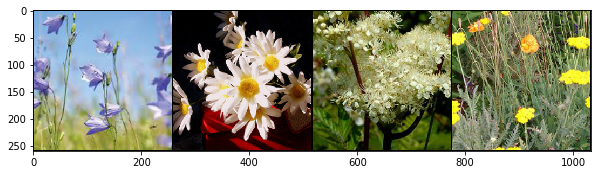

labels = tensor([26, 16, 36, 21]) ['Harebell', 'Daisy Fleabane', 'Meadowsweet', 'Fern Leaf Yarrow']


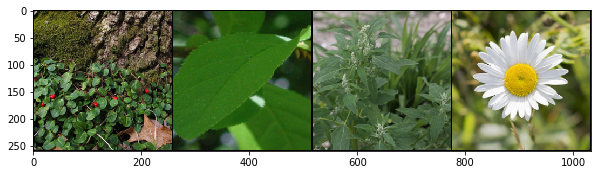

labels = tensor([40, 58, 33, 16]) ['Partridgeberry', 'Wild Black Cherry', 'Lambs Quarters', 'Daisy Fleabane']


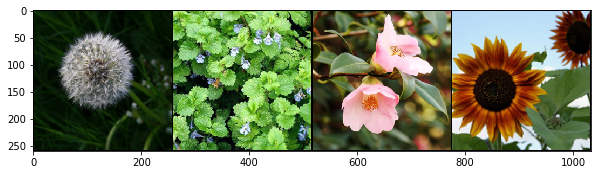

labels = tensor([17, 13, 53, 51]) ['Dandellion', 'Creeping Charlie', 'Tea Plant', 'Sunflower']


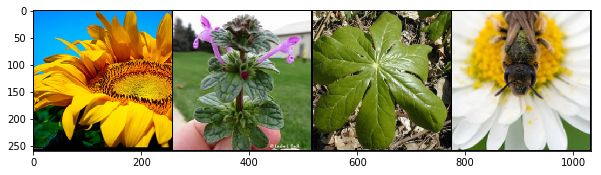

labels = tensor([51, 27, 35, 16]) ['Sunflower', 'Henbit', 'Mayapple', 'Daisy Fleabane']


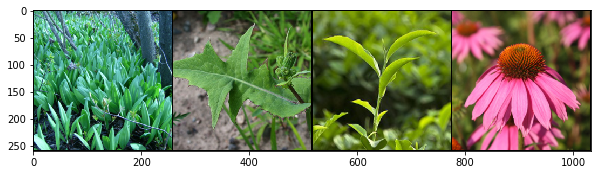

labels = tensor([60, 10, 53, 12]) ['Wild Leek', 'Common Sow Thistle', 'Tea Plant', 'Coneflower']


In [275]:
import torchvision
for i_batch, sample_batched in enumerate(dataloader):
    images = sample_batched[0]
    imshow(torchvision.utils.make_grid(images))
    print('labels =', sample_batched[1], [ train_dataset.classes[k] for k in sample_batched[1]])
    if i_batch == 4:
          break

In [ ]:
## 